# Titanic Project!

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
#sns.set(font_scale=2.5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
submission_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [2]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


#  **Dataset Check** 

In [3]:
train_df.head()
# PassengerID: 탑승자 데이터 번호
# survived : 생존 1, 사망 0
# Pclass: 선실등급 1등석~3등석
# Sex: 성별
# Name: 이름
# Age: 나이
# SibSp: 같이 탑승한 형제자매, 배우자 인원
# parch: 같이 탑승한 부모, 어린이 인원수
# ticket: 티켓 번호
# Fare: 요금
# Cabin: 선실번호
# Embarked: 중간정착항구 약어 C, Q, S

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Age, Cabin, Embarked 는 Null Data를 가짐 
* sklearn은 Null Data 시 오류가 나므로 결측치를 채워줘야 함 

# **Feature Engineering**

# **1. How many Survived**

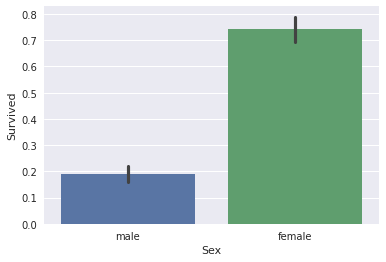

In [7]:
sns.barplot(x='Sex', y='Survived', data=train_df);

여성이 남성보다 4배정도 생존률이 높은 것으로 확인됨.  
이는 여성과 어린이를 먼저 탈출시키는 방식이 반영된 결과로 해석

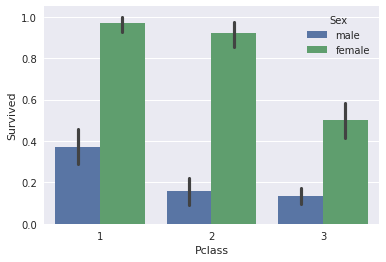

In [8]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df);

더 높은 등석으로 갈수록 생존률이 높아짐 

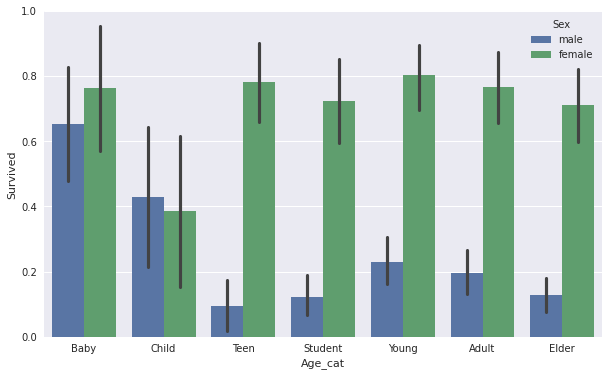

In [9]:
def get_name(age):
    if (age<=5): return 'Baby'
    elif (age<=13): return 'Child'
    elif (age<=19): return 'Teen'
    elif (age<=25): return 'Student'
    elif (age<=35): return 'Young'
    elif (age<=55): return 'Adult'
    else: return 'Elder'


plt.figure(figsize=(10,6))
group_names=["Baby","Child","Teen", "Student","Young", "Adult", "Elder"] # group name order
train_df['Age_cat']=train_df['Age'].apply(lambda x: get_name(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=train_df, order=group_names)
train_df.drop('Age_cat', axis=1, inplace=True)

어린아이와 여성의 생존률이 높음을 확인할 수 있음

# **2. Analysing The Features**

## **Feature 1: Sex**

In [10]:
# sex & survived
train_df.groupby(['Sex', 'Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

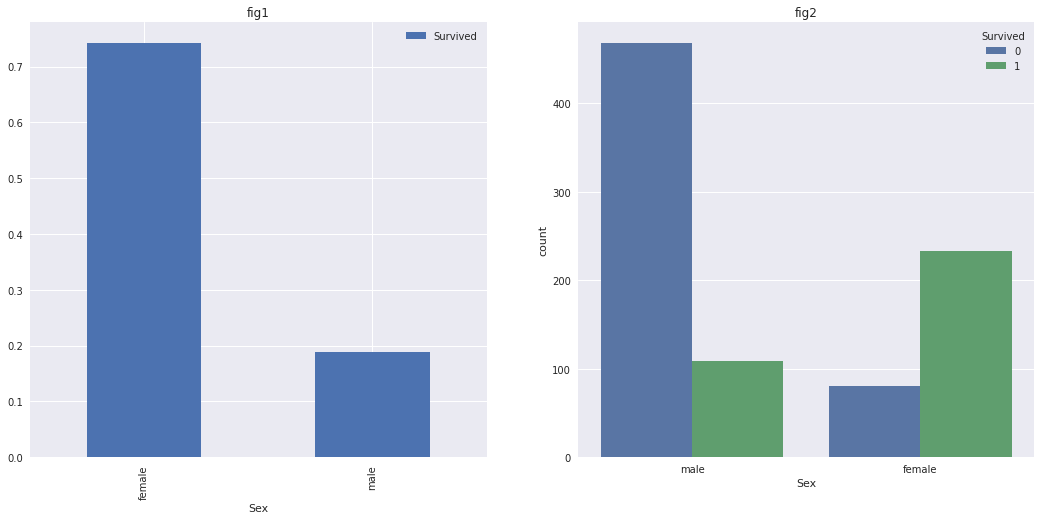

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('fig1')
sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('fig2')
plt.show()

*  성(Sex)이 생존(Survived)에 중요한 영향을 미치는 변수임을 알 수 있음(fig1)  
*  남성과 여성의 생사여부가 정반대로 나타나는 결과(fig2)

## **Feature 2: Pclass**

In [12]:
pd.crosstab(train_df.Pclass,train_df.Survived,margins=True).style.background_gradient() # margins: 총합

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


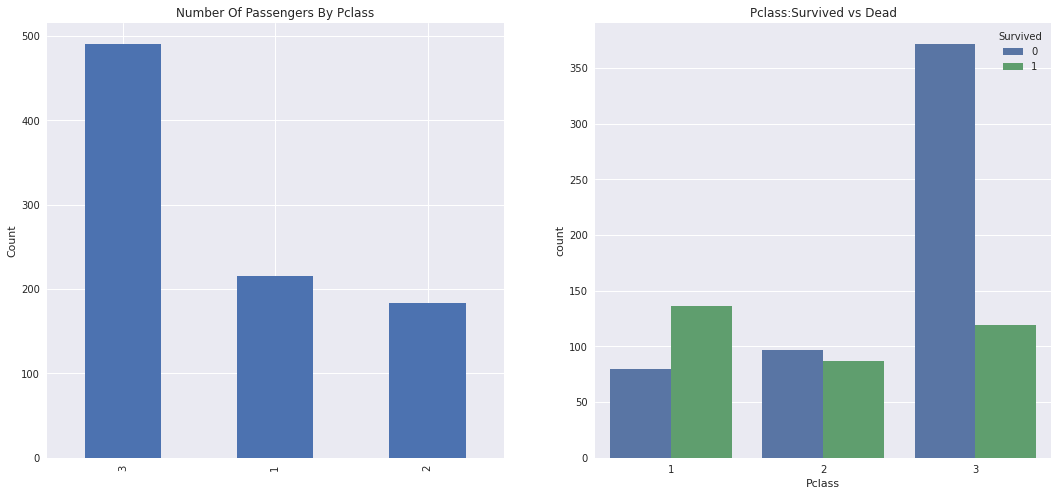

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

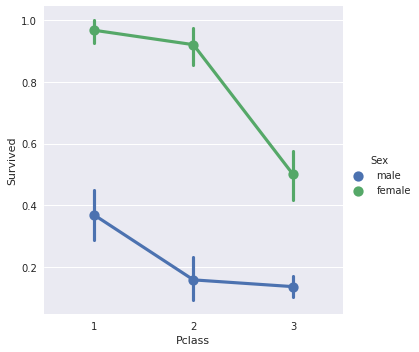

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()

* factorplot 함수는 범주형 데이터 시각화에 유리함  
* Pclass 역시 생존에 중요한 영향을 끼치는 feature임을 확인

## **Feature 3: Age**

In [15]:
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',round(train_df['Age'].mean(),2),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


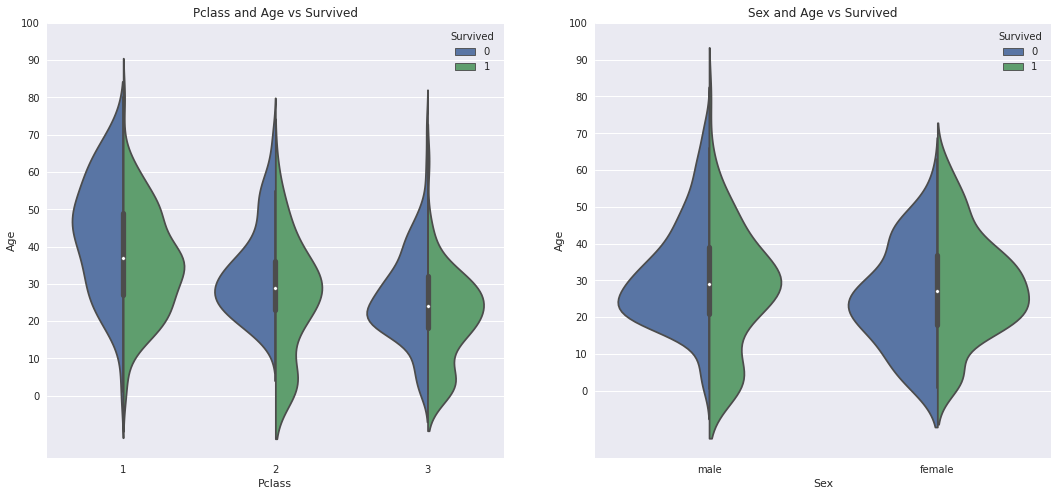

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

*  Pclass가 높을수록 생존비율이 높아짐    
*  여자는 생존비율이 높고 남자는 사망비율이 높음  
*  남녀 모두 20~30대가 생존과 사망률이 비슷하게 분포

### **Age 결측치 데이터 채우기**
문제점: Age에는 177개의 Null Data가 있었음  
해결책: 평균나이로 채우기

In [17]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

## **Feature 4: Embarked**

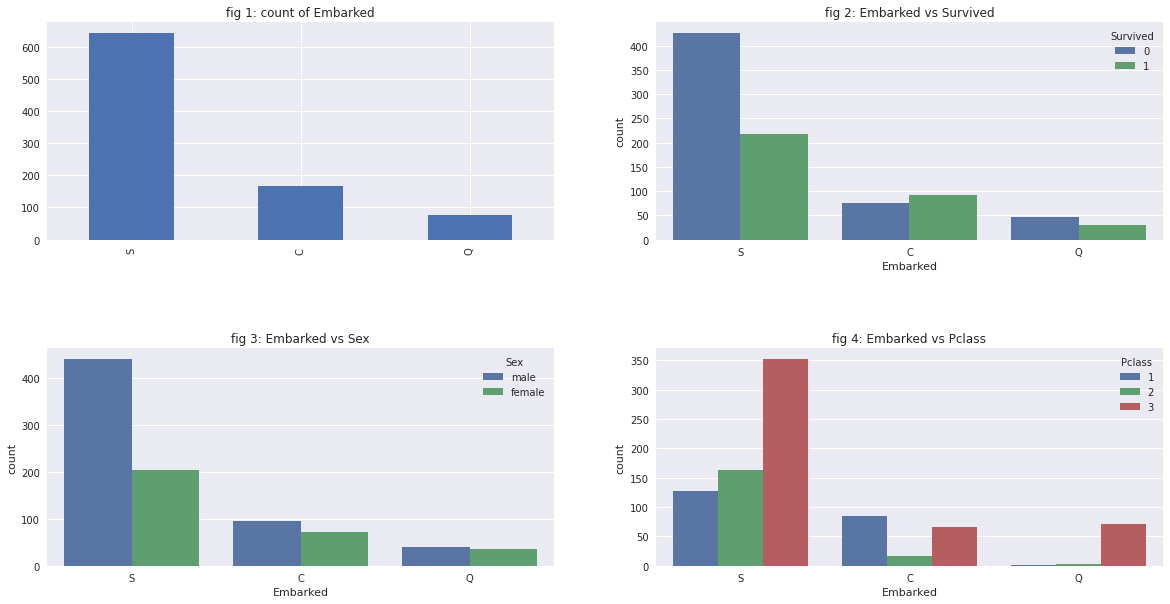

In [18]:
f,ax=plt.subplots(2,2,figsize=(20,10))

train_df['Embarked'].value_counts().plot.bar(ax=ax[0,0])
ax[0,0].set_title('fig 1: count of Embarked')

sns.countplot('Embarked',hue='Survived',data=train_df,ax=ax[0,1])
ax[0,1].set_title('fig 2: Embarked vs Survived')

sns.countplot('Embarked',hue='Sex',data=train_df,ax=ax[1,0])
ax[1,0].set_title('fig 3: Embarked vs Sex')

sns.countplot('Embarked',hue='Pclass',data=train_df,ax=ax[1,1])
ax[1,1].set_title('fig 4: Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)

plt.show()

* S, C, Q 중 S가 매우 높은 비중을 차지
* Sex와 Survived 모두 S,C,Q에서 유사한 비율을 차지함

### **Embarked 결측치 채우기**
2개밖에 없으므로 3/4 이상 차지하는 S로 채워줌

In [19]:
train_df['Embarked'].fillna('S', inplace=True)
train_df.Embarked.isnull().any()

False

## **Feature 5: SibSp**

In [20]:
pd.crosstab([train_df.SibSp],train_df.Survived, margins=True).style.background_gradient()

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


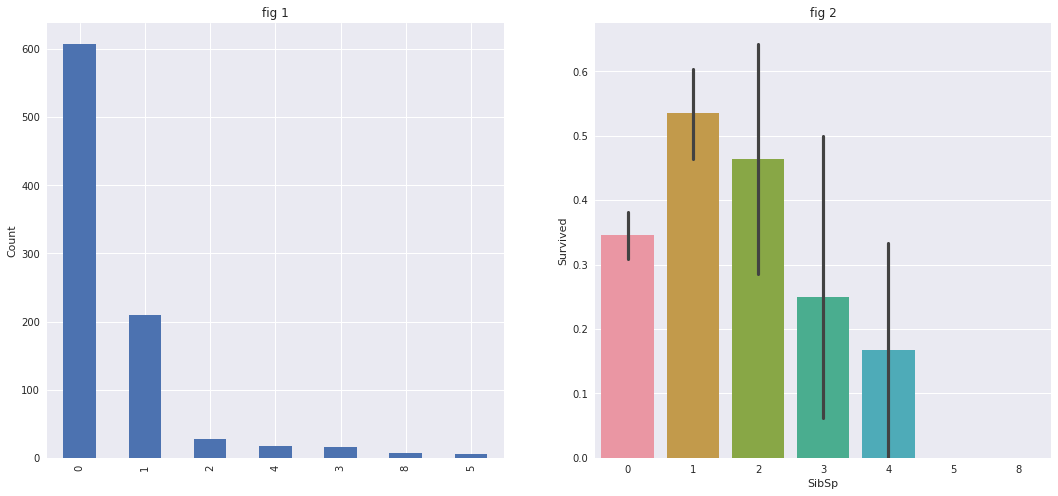

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['SibSp'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('fig 1')
ax[0].set_ylabel('Count')
sns.barplot('SibSp','Survived',data=train_df,ax=ax[1])
ax[1].set_title('fig 2')
plt.show()

*  SibSp가 0명인 승객이 67%이고 1명인 승객이 23%로 둘이 약 90%를 차지함
*  형제, 자매가 1~2명 있는 경우 0명인 사람보다 높은 생존률을 보임

## **Feature 6: Parch**

In [22]:
pd.crosstab([train_df.Parch],train_df.Survived, margins=True).style.background_gradient()

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


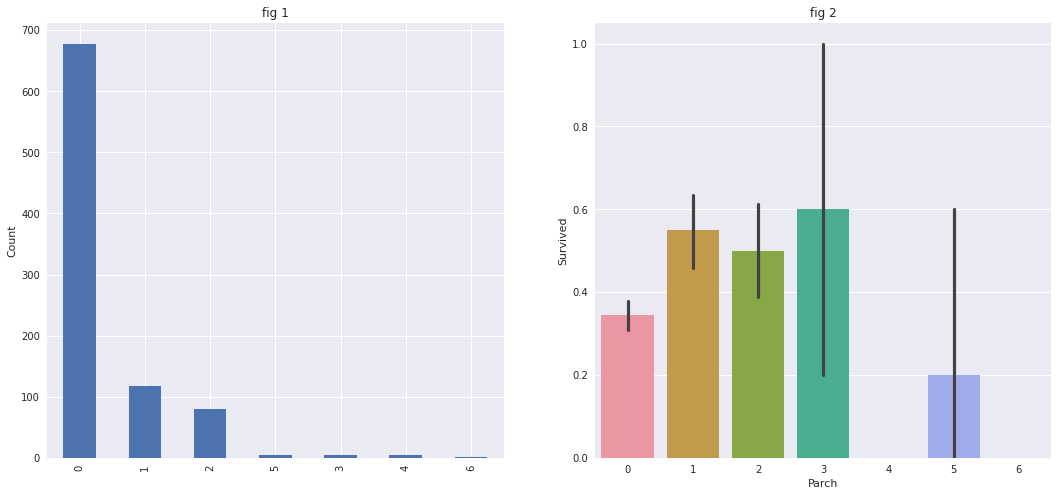

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Parch'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('fig 1')
ax[0].set_ylabel('Count')
sns.barplot('Parch','Survived',data=train_df,ax=ax[1])
ax[1].set_title('fig 2')
plt.show()

* Parch 역시 0과 1 값이 주를 이루고 있음
* Parch 역시 SibSp과 마찬가지로 1명이상인 경우가 0명보다 생존률이 높음 

## **Feature 7: Fare (Continous Feature)**

In [24]:
print("Min Fare :", train_df['Fare'].min())
print("Max Fare :", train_df['Fare'].max())
print("Average Fare :", round(train_df['Fare'].mean(),2))

Min Fare : 0.0
Max Fare : 512.3292
Average Fare : 32.2


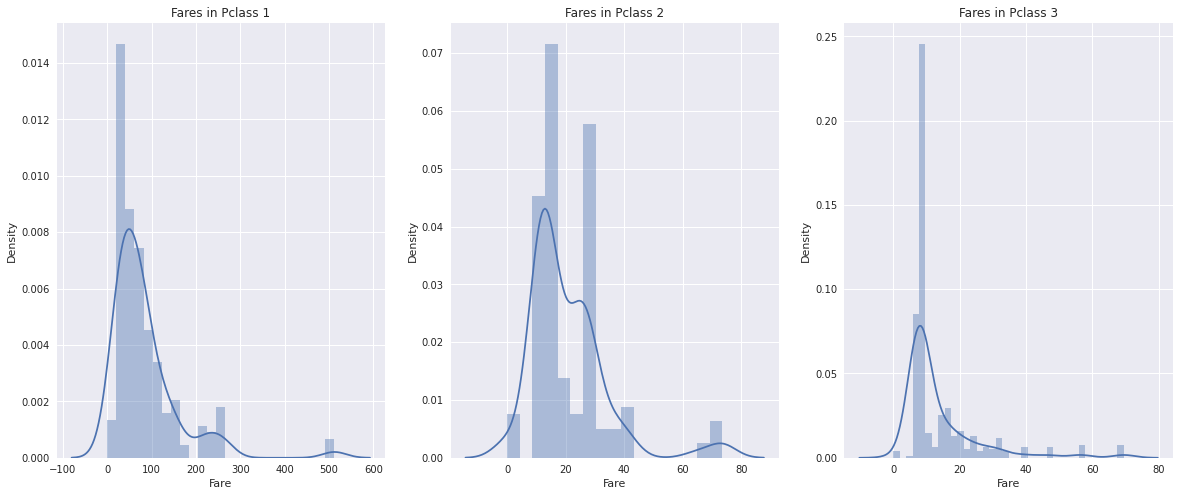

In [25]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_df[train_df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_df[train_df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_df[train_df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

# **Feature Result** 

* **Sex**: 여성이 남성보다 생존률이 높음
* **Pclass**: 좋은 등석일수록 생존률이 높음
* **Age**: 어린아이(age<=5)가 생존률이 높고, 14~25세가 가장 많이 사망함
* **Embarked**: 'S'가 가장 많고 그 안에서 Pclass가 1<2<3등석 인원순으로 분포함 
* **Fare**: Pclass의 1,2,3등석에 따라 요금도 그에 상응하는 결과를 보임
* **SibSp,Parch**: 둘 모두 0명보다 1~3명정도 존재할 때 생존률이 높음

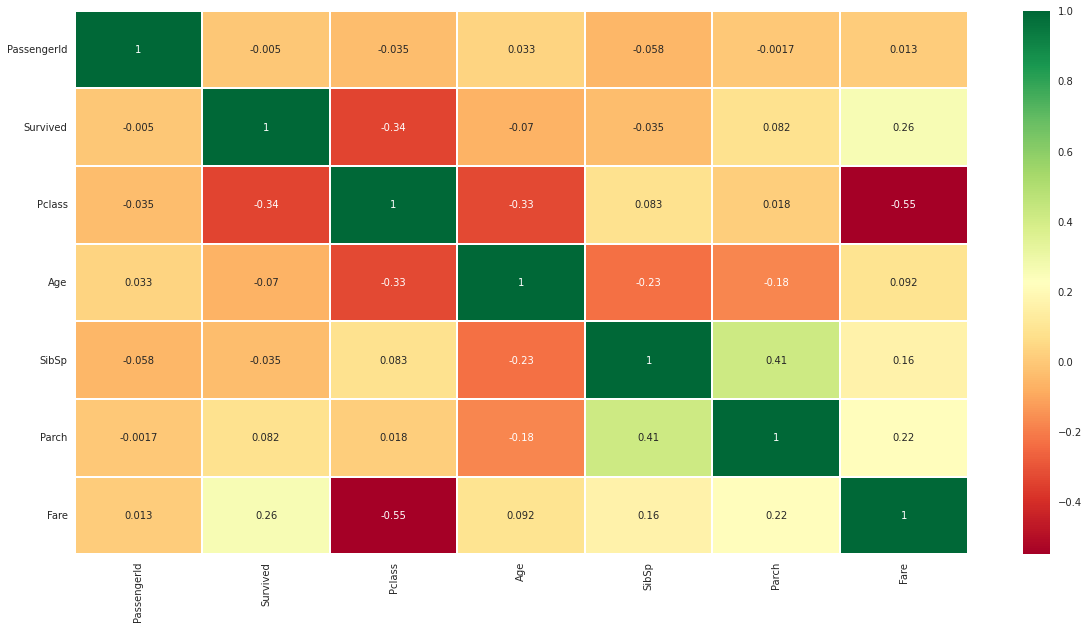

In [26]:
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

*  SibSp와 Parch는 상관계수가 높음을 알 수 있음
*  상관계수가 매우 높은 두 feature면 둘 중 하나만 선택하는 것도 방법

# **데이터 전처리**

In [27]:
# 불필요한 특성 제거
def drop(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return df

# 문자형을 숫자로 변환 
def encode(df):
    df['Sex'].replace(['male','female'],[0,1],inplace=True)
    df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
    return df

# 결측치 채우기
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    return df



In [28]:
y_titanic=train_df['Survived']
X_titanic=train_df.drop('Survived', axis=1)
drop(X_titanic)
encode(X_titanic)
fillna(X_titanic)
X_titanic.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic, y_titanic, test_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# **이진분류 수행(최적화 X)**

## 1. LogisticRegression

In [31]:
# 로지스틱 회귀
lr=LogisticRegression()
lr.fit(X_train, y_train)
print("Train_scores: ", lr.score(X_train, y_train))
print("Test_scores: ", lr.score(X_test, y_test))

Train_scores:  0.800561797752809
Test_scores:  0.7988826815642458


## 2. Decision Tree

In [32]:
# 결정트리
dt=DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)
print("Train_scores: ", dt.score(X_train, y_train))
print("Test_scores: ", dt.score(X_test, y_test))
print(dt.feature_importances_)

Train_scores:  0.9859550561797753
Test_scores:  0.776536312849162
[0.07283768 0.30228295 0.24793114 0.0725769  0.02027181 0.25711877
 0.02698075]


## 3. Random Forest

In [33]:
rf=RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
print("Train_scores: ", rf.score(X_train, y_train))
print("Test_scores: ", rf.score(X_test, y_test))
print(dt.feature_importances_)

Train_scores:  0.9859550561797753
Test_scores:  0.8379888268156425
[0.07283768 0.30228295 0.24793114 0.0725769  0.02027181 0.25711877
 0.02698075]


# **GridSearch**

## 1. Logistic Regression

In [34]:
params={
    "C":[2, 4, 6, 8, 10],
    "max_iter":[100, 200, 300, 400, 500]
}
lr=LogisticRegression()
lr_grid=GridSearchCV(lr, param_grid=params, cv=5)
lr_grid.fit(X_train, y_train)
print(lr_grid.best_score_)
print(lr_grid.best_estimator_)

0.7962868117797696
LogisticRegression(C=2, max_iter=200)


## 2. Random Forest

In [35]:
params={"max_depth": [2, 3, 4, 5],
              "max_features": [1, 3, 5, 7],
              "min_samples_split": [2, 3, 4, 5],
              "min_samples_leaf": [1, 3, 5],
              "bootstrap": [False],
              "n_estimators" :[100,200,300],
              "criterion": ["gini"]
       }
rf=RandomForestClassifier(random_state=10)
gd=GridSearchCV(rf,param_grid=params,verbose=True, n_jobs=-1)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
# tunning model
rfc=gd.best_estimator_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
0.8313995863291638
RandomForestClassifier(bootstrap=False, max_depth=5, max_features=3,
                       random_state=10)


In [36]:
gd.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

# **Testing**

In [37]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
ID=test_df['PassengerId']
drop(test_df)
encode(test_df)
fillna(test_df)
print(test_df.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         2
1       3    1  47.0      1      0   7.0000         0
2       2    0  62.0      0      0   9.6875         2
3       3    0  27.0      0      0   8.6625         0
4       3    1  22.0      1      1  12.2875         0


In [39]:
print("Train_scores: ", rfc.score(X_train, y_train))
print("Test_scores: ", rfc.score(X_test, y_test))

Train_scores:  0.8581460674157303
Test_scores:  0.8435754189944135


In [40]:
result = pd.DataFrame({ 'PassengerId': ID, 'Survived': rfc.predict(test_df) })
result.to_csv("titanic_RandomForest.csv", index=False)
result.head(10)
result.shape

(418, 2)